> COVID-19 - Exploratory Analysis

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import px

# _Import Dataset_

In [344]:
path = '../../data/novel-corona-virus-2019-dataset/'
!ls {path}

COVID19_line_list_data.csv         time_series_covid_19_confirmed.csv
COVID19_open_line_list.csv         time_series_covid_19_deaths.csv
covid_19_data.csv                  time_series_covid_19_recovered.csv


In [185]:
df_covid_info = pd.read_csv(f'{path}COVID19_line_list_data.csv', parse_dates=True)

In [186]:
df_covid_info.columns

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

_Filter out unnecessary dimensions:_

In [187]:
df_covid_info = df_covid_info[
    ['location',
     'country',
     'gender',
     'age',
     'death',
     'recovered']]; df_covid_info.head(3)

,location,country,gender,age,death,recovered
0,"Shenzhen, Guangdong",China,male,66.0,0,0
1,Shanghai,China,female,56.0,0,0
2,Zhejiang,China,male,46.0,0,0


# _Age of Patients_
_Dataset with patients data is too small to be considered representative of the population._

## _Binarize Recovered Patients_

In [188]:
df_covid_info.dropna(subset=['age'], inplace=True)

In [189]:
import re

def recovered_binary(array):
    """Recovery status binarized function"""
    
    recovered_binary = []
    for i in array['recovered']: 
        if re.search(r'/', i):
            recovered_binary.append(1)

        elif re.search(r'1', i):
            recovered_binary.append(1)

        else:
            recovered_binary.append(0)
            
    return recovered_binary

## _Binarize Death Patients_

In [190]:
df_covid_info.columns

Index(['location', 'country', 'gender', 'age', 'death', 'recovered'], dtype='object')

In [191]:
def death_binary(array):
    """Recovery status binarized function"""
    
    death_binary = []
    for i in array['death']: 
        if re.search(r'/', i):
            death_binary.append(1)

        elif re.search(r'1', i):
            death_binary.append(1)

        else:
            death_binary.append(0)
            
    return death_binary

In [192]:
df_covid_info['recovered_bin'] = recovered_binary(df_covid_info)

In [193]:
df_covid_info['death_bin'] = death_binary(df_covid_info)

In [194]:
df_covid_info['age'] = df_covid_info['age'].astype(int)

## _Basic Stats Referring to Age_

In [195]:
df_covid_info.groupby('gender').agg(
    {
        'age':'mean'
    }
)

,age
gender,
female,49.630372
male,49.846639


In [196]:
len(df_covid_info[df_covid_info['recovered_bin'] == 1])

145

In [288]:
np.mean(df_covid_info[df_covid_info['death_bin'] == 1]['age'])

68.58620689655173

In [289]:
np.mean(df_covid_info[df_covid_info['recovered_bin'] == 1]['age'])

42.7972027972028

In [290]:
df_covid_info = df_covid_info[df_covid_info['age'] > 0]

In [291]:
df_deaths = df_covid_info[(df_covid_info['age'] >0) & (df_covid_info['death_bin'] == 1)]

In [293]:
df_deaths.describe().T

,count,mean,std,min,25%,50%,75%,max
age,58.0,68.586207,13.581508,36.0,60.25,69.5,80.0,89.0
recovered_bin,58.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
death_bin,58.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0


# _Analysis referring to Italy_

_Extract data regarding Italy, dataset is updated till 11th of March._

In [382]:
df = pd.read_csv(f'{path}COVID19_open_line_list.csv', parse_dates=True)

In [383]:
italy_ = df[df['country'] == 'Italy']

In [384]:
italy_.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
3197,3226.0,NaN,male,Rome,Lazio,Italy,1.0,41.88333,12.500000,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3198,3227.0,NaN,female,Rome,Lazio,Italy,1.0,41.88333,12.500000,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10374,10674.0,29,male,"Luzzara, Reggio Emilia",Emilia-Romagna,Italy,1.0,44.95971,10.689220,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11206,11512.0,38,male,Codogno,Lombardia,Italy,1.0,45.16110,9.701432,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11207,11513.0,NaN,female,Codogno,Lombardia,Italy,1.0,45.16110,9.701432,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
italy_.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [386]:
set(italy_['outcome'])

{'death', 'discharge', nan}

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



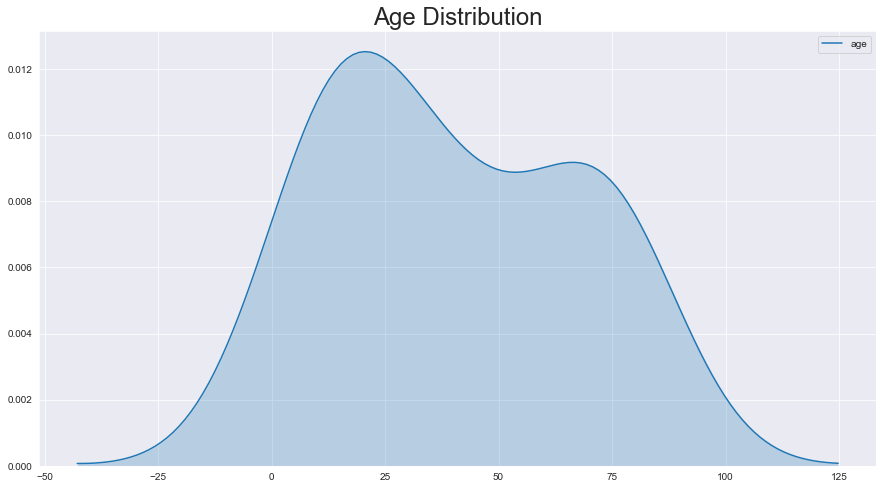

In [387]:
plt.figure(figsize=(15,8))
plt.title('Age Distribution', fontdict={'fontsize':24})
sns.kdeplot(data=italy_['age'], shade=True);

In [388]:
italy_.dropna(subset=['age'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [389]:
italy_['age'] = italy_['age'].astype(int)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



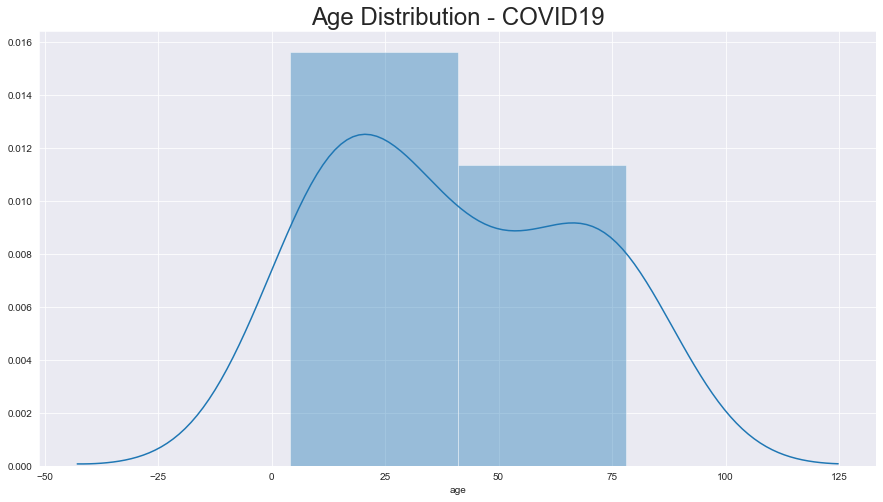

In [390]:
plt.figure(figsize=(15,8))
plt.title('Age Distribution - COVID19', fontdict={'fontsize':24})
sns.set_style('darkgrid')
sns.distplot(italy_['age']);

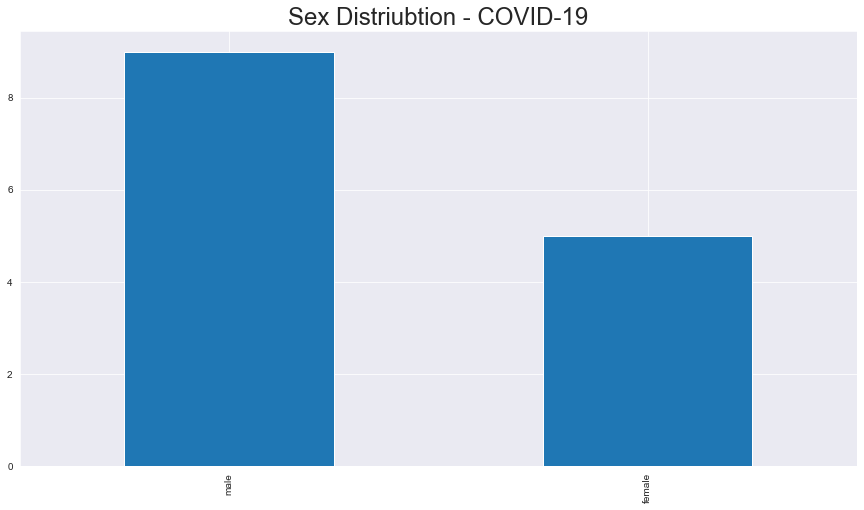

In [391]:
plt.figure(figsize=(15,8))
plt.title('Sex Distriubtion - COVID-19', fontdict={'fontsize':24})
italy_['sex'].value_counts().plot.bar();

# _Forecast preparation on bigger dataset_

_Create a forecast regarding Italy data. Use prophet first, later RNN, and SARIMA._

In [392]:
df = pd.read_csv(f'{path}/covid_19_data.csv', parse_dates=True)

In [361]:
df.columns = map(str.lower, df.columns)

In [375]:
df.head(33)

,sno,observationdate,province/state,country/region,last update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


_Extract Italy data._

In [363]:
italy_df = df[df['country/region'] == 'Italy']

italy_df = italy_df[['observationdate','last update','confirmed','deaths','recovered']]

In [364]:
italy_df = italy_df.reset_index(drop=True)

In [377]:
italy_df = italy_df.loc[30:]

## _Forecast - People Affected next 7 days_
_Forecast the growth in terms of people infected by COV-19. Dataset ends on the 11th, after will be the forecasted value. Not going to train and test, because the datarange is fairly small yet._

In [378]:
italy_dataframe_f = italy_df[['observationdate','confirmed']]

In [379]:
italy_dataframe_f.rename(columns={
    'observationdate':'ds',
    'confirmed':'y'}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [380]:
italy_dataframe_f.head(22)

,ds,y
30,03/01/20,1694
31,03/02/20,2036
32,03/03/20,2502
33,03/04/20,3089
34,03/05/20,3858
35,03/06/20,4636
36,03/07/20,5883
37,03/08/20,7375
38,03/09/20,9172
39,03/10/20,10149


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


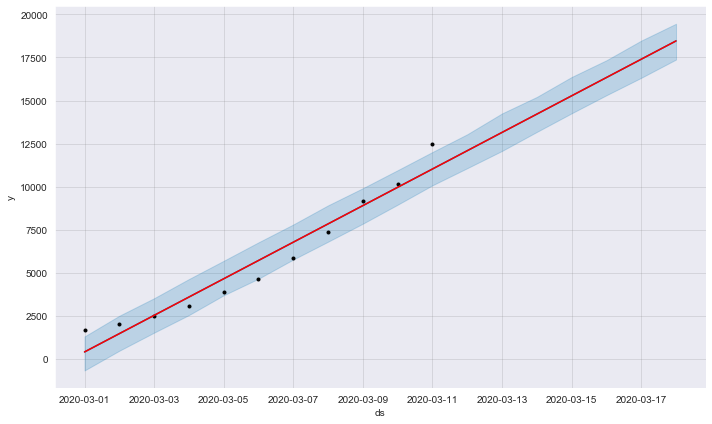

In [381]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
pd.plotting.register_matplotlib_converters()


model = Prophet(seasonality_mode='multiplicative')
model.fit(italy_dataframe_f)

# forecast 180 days ahead
future = model.make_future_dataframe(periods=7, freq='D',)
italy_forecast = model.predict(future)

fig = model.plot(italy_forecast)
ax = add_changepoints_to_plot(fig.gca(), model, italy_forecast)

In [394]:
italy_forecast[['ds','yhat']]

,ds,yhat
0,2020-03-01,402.781889
1,2020-03-02,1464.909808
2,2020-03-03,2527.037728
3,2020-03-04,3589.165648
4,2020-03-05,4651.293567
5,2020-03-06,5713.421488
6,2020-03-07,6775.721516
7,2020-03-08,7838.021567
8,2020-03-09,8900.321617
9,2020-03-10,9962.621667
